# Bağlantı

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


# K - Means

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

## Veri Seti

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/USArrests.csv', index_col= 0) #index_col ile index numaraları kalktı
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.isnull().sum() # Veri setinde eksik gözlem kontrolü

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df.describe().T # Betimsel istatistikleri

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


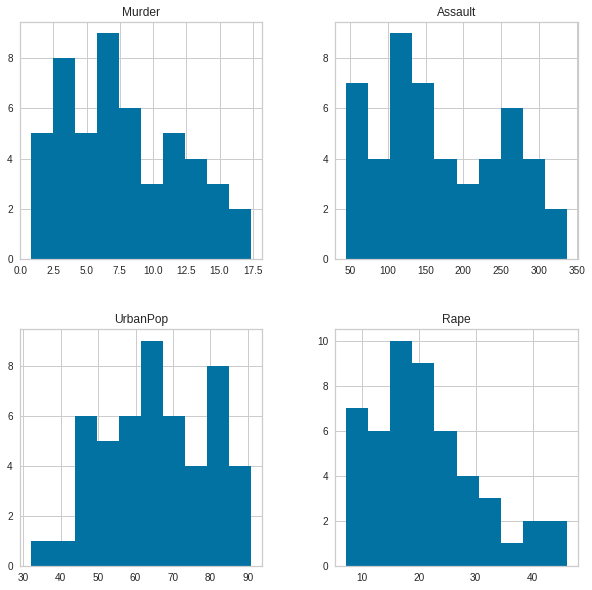

In [ ]:
df.hist(figsize= (10,10));

## Uygulama

In [ ]:
kmeans = KMeans(n_clusters= 4)

In [ ]:
k_fit = kmeans.fit(df)

In [ ]:
k_fit.n_clusters #Küme sayısı

4

In [ ]:
k_fit.cluster_centers_ # 4 adet kümenin merkezler

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [ ]:
k_fit.labels_ # Gözlemlerin sınıf etiketleri

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2], dtype=int32)

## Kümelerin Görseleştirilmesi

In [ ]:
k_means = KMeans(n_clusters= 2).fit(df)

In [ ]:
kumeler = k_means.labels_

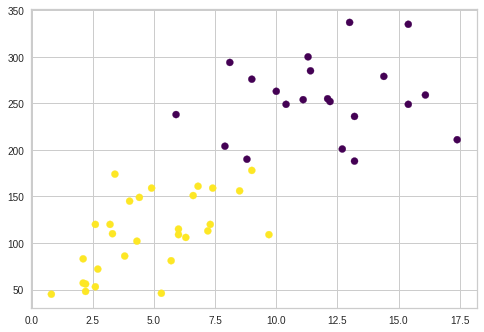

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s= 50, cmap= "viridis");# iloc bağımsız bir şekilde satır ve sutundan seçim işlemi

In [ ]:
merkezler = k_means.cluster_centers_

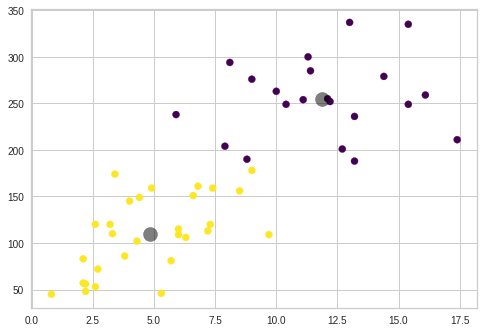

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s= 50, cmap= "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c= "black", s=200, alpha=0.5);

## Optimum Küme Sayısını Bulma

In [ ]:
ssd = []#uzaklıkların kareleri
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)


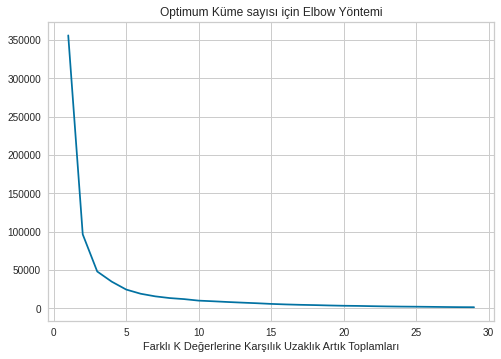

In [ ]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi");

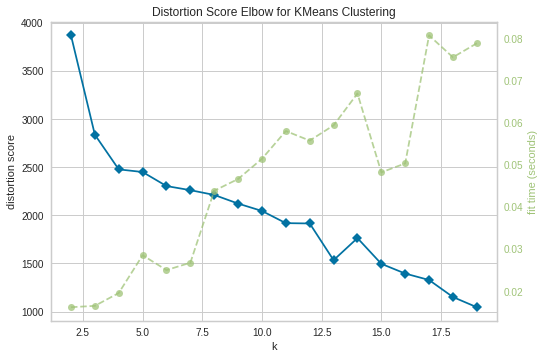

In [ ]:
# Elbow yöntemine altarnatif
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof()

In [ ]:
kmeans = KMeans(n_clusters= 4).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kumeler = kmeans.labels_

In [ ]:
pd.DataFrame({"Eyaletler": df.index, "Kümler": kumeler})

,Eyaletler,Kümler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [ ]:
df["Kume_No"] = kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2


# Hiyerarşik Kümeleme

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.cluster.hierarchy import linkage, dendrogram
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

## Veri Seti

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/USArrests.csv', index_col= 0) #index_col ile index numaraları kalktı
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Uygulama

In [ ]:
hc_comlete = linkage(df, "complete")
hc_average = linkage(df, "average")

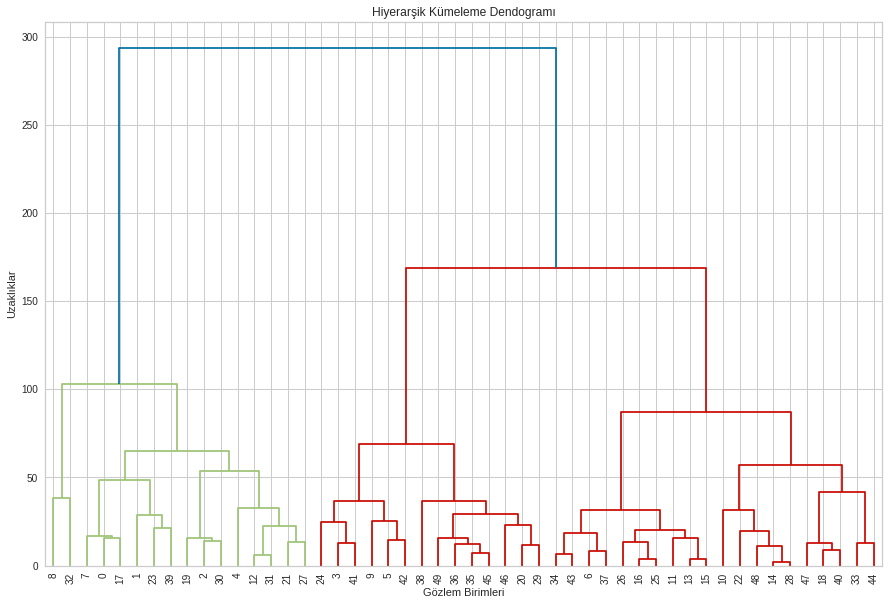

In [ ]:
plt.figure(figsize= (15,10)) #boyut ayarlama görselin
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_comlete, leaf_font_size= 10);

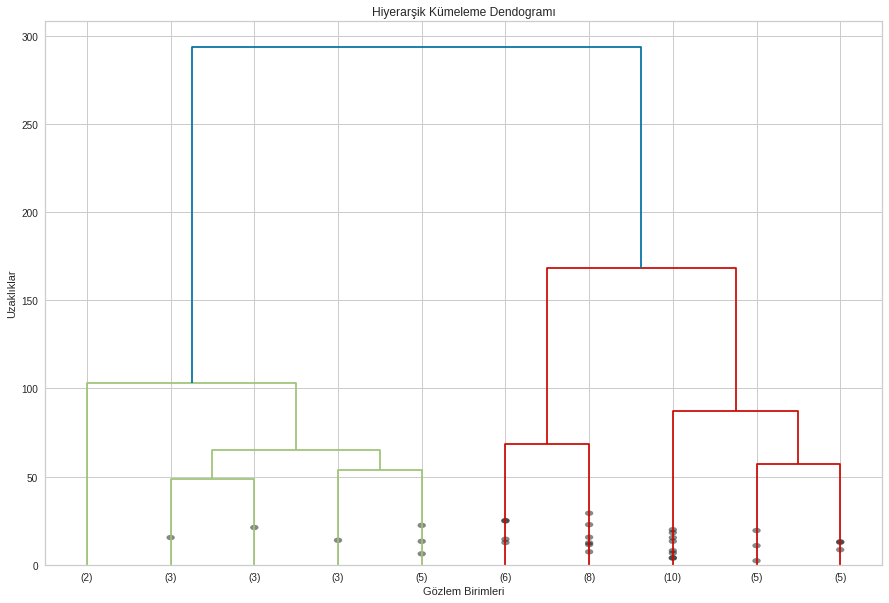

In [ ]:
plt.figure(figsize= (15,10)) #boyut ayarlama görselin
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_comlete, leaf_font_size= 10, truncate_mode= "lastp", p= 10, show_contracted= True); # lastp= en son p adet göster demek

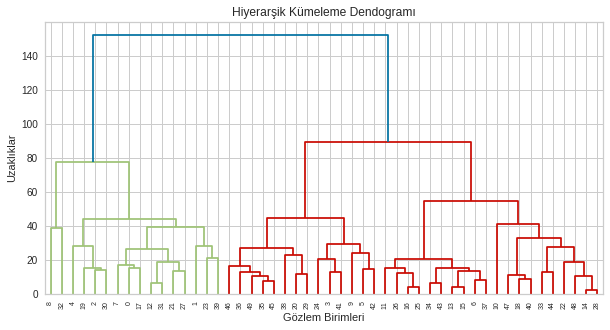

In [ ]:
plt.figure(figsize= (10,5)) #boyut ayarlama görselin
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average, leaf_font_size= 7);

# Tmel Bileşen Analizi

## Kütüphane

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA # Temel bileşen indirme

## Veri Seti

In [ ]:
df = pd.read_csv('/content/drive/Colab Notebooks/MakineOgrenmesi/Hitters.csv') #index_col ile index numaraları kalktı
df.dropna(inplace= True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


## uygulama

In [ ]:
df = StandardScaler().fit_transform(df)

In [ ]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [ ]:
# veri setini iki bileşene indirme
pca = PCA(n_components= 2)
pca_fit = pca.fit_transform(df) # amaç elimizde çok olan değişkeni aza indirmeye çalışıyoruz

In [ ]:
bilesen_df = pd.DataFrame(data = pca_fit, columns= ["birinci_bilesen","ikinci_bilesen"])
bilesen_df # bunu yaparken veri kayıplarını göze alırız

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [ ]:
pca.explained_variance_ratio_ #açıklanan varyans

array([0.45245466, 0.24246801])

In [ ]:
pca.components_[1]# bileşenlere özel erişme

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

Text(0, 0.5, 'Kümülatif Varyans Oranı')

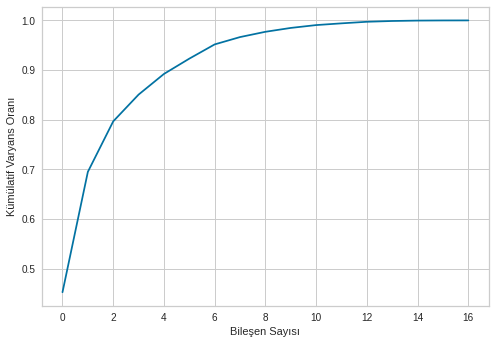

In [ ]:
# optimum bileşen sayısına karar verme
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # kümülatif toplam işlemi
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")

In [ ]:
#Final modeli
pca = PCA(n_components= 3)
pca_fit = pca.fit_transform(df)

In [ ]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])